## **Analyzing The Evolution of Characters' Importance**

In [14]:
from pyvis.network import Network
import community as community_louvain

import os
import re

from Functionalities import *

### Data Preparation

In [2]:
character_df = pd.DataFrame(pd.read_csv('./data/characters_struct.csv'))

In [3]:
character_df.head()

,book,character,character_firstName
0,Category:Baptism of Fire characters,Adalia,Adalia
1,Category:Baptism of Fire characters,Adela,Adela
2,Category:Baptism of Fire characters,Aen Saevherne,Aen
3,Category:Baptism of Fire characters,Aevenien,Aevenien
4,Category:Baptism of Fire characters,Aglaïs,Aglaïs


In [4]:
all_books = [b for b in os.scandir('data') if '.txt' in b.name]

In [5]:
all_books

[<DirEntry '4 Times of Contempt.txt'>,
 <DirEntry '3 Blood of Elves.txt'>,
 <DirEntry '6 The Tower of the Swallow.txt'>,
 <DirEntry '8 something ends something begins.txt'>,
 <DirEntry '1 The Last Wish.txt'>,
 <DirEntry '5 Baptism of Fire.txt'>,
 <DirEntry '7 The Lady of the Lake.txt'>,
 <DirEntry '2 The Sword of Destiny.txt'>]

### Sort for book order

In [6]:
all_books.sort(key = lambda x : x.name)

In [7]:
all_books

[<DirEntry '1 The Last Wish.txt'>,
 <DirEntry '2 The Sword of Destiny.txt'>,
 <DirEntry '3 Blood of Elves.txt'>,
 <DirEntry '4 Times of Contempt.txt'>,
 <DirEntry '5 Baptism of Fire.txt'>,
 <DirEntry '6 The Tower of the Swallow.txt'>,
 <DirEntry '7 The Lady of the Lake.txt'>,
 <DirEntry '8 something ends something begins.txt'>]

### Looping through the books and creating graphs

In [8]:
# Initializing a list to store graphs of The Witcher books
books_graph = []

In [9]:
for book in all_books:
    book_text = named_entity_relationship(book)
    
    # Get list of entities per sentence
    sent_entity_df = get_namedEntity_list_perSentence(book_text)
    
    # Create a 'character_entities' column by filtering out entity relations that are not part of the characters in the book
    sent_entity_df['character_entities'] = sent_entity_df['Entities'].apply(lambda x: filter_entity(x, character_df))
    
    # Filtering sentences that don't have character entities (empty lists)
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
    
    # Representing character entities with only their first names
    sent_entity_df_filtered['character_entities'].apply(lambda x: [name.split()[0] for name in x])
    
    # Creating relationship among characters
    relationship_df = create_relationships(sent_entity_df_filtered, window_size=5) # By default window_size is set to 5 and described here just for illustration purposes
    
    # Creating a graph from pandas edgelist
    G = nx.from_pandas_edgelist(relationship_df,
                                source = "Source",
                                target = "Target",
                                edge_attr = "Weight",
                                create_using = nx.Graph())
    books_graph.append(G)

In [10]:
# Creating a list of degree centrality of all the books
degree_centrality_books = [nx.degree_centrality(book) for book in books_graph]

# Making a DataFrame out of degree_centrality_books
degree_centrality_books_df = pd.DataFrame.from_records(degree_centrality_books)

In [11]:
degree_centrality_books

[{'Geralt': 0.63,
  'Velerad': 0.04,
  'Ostrit': 0.04,
  'Segelin': 0.02,
  'Foltest': 0.04,
  'Adda': 0.01,
  'Iola': 0.03,
  'Nenneke': 0.06,
  'Yennefer': 0.14,
  'Roach': 0.04,
  'Rulle Asper': 0.02,
  'Two': 0.09,
  'Nivellen': 0.06,
  'Fenne': 0.02,
  'Primula': 0.03,
  'Ilka': 0.02,
  'Venimira': 0.02,
  'Glutton': 0.02,
  'Vereena': 0.04,
  'Hereward': 0.02,
  'Falwick': 0.04,
  'White': 0.01,
  'Dragomir': 0.01,
  'Trigla': 0.01,
  'Caldemeyn': 0.04,
  'Borg': 0.02,
  'Karelka': 0.01,
  'Irion': 0.01,
  'Stregobor': 0.08,
  'Zavist': 0.02,
  'Idi': 0.02,
  'Fialka': 0.02,
  'Silvena': 0.01,
  'Evermir': 0.02,
  'Abrad': 0.01,
  'Fredefalk': 0.04,
  'Aridea': 0.04,
  'Renfri': 0.11,
  'Eltibald': 0.01,
  'Vyr': 0.02,
  'Nimir': 0.04,
  'Nohorn': 0.07,
  'Tavik': 0.05,
  'Civril': 0.05,
  'Fifteen': 0.06,
  'Audoen': 0.04,
  'Libushe': 0.01,
  'Marilka': 0.02,
  'Abergard': 0.02,
  'Haxo': 0.02,
  'Drogodar': 0.05,
  'Rainfarn': 0.09,
  'Calanthe': 0.08,
  'Baron': 0.01,
  'Pave

In [12]:
degree_centrality_books_df

,Geralt,Velerad,Ostrit,Segelin,Foltest,Adda,Iola,Nenneke,Yennefer,Roach,...,Kashka,Sulivoy,Matholm,Devereux,Yves,Merle,Willem,Gardenia Biberveldt,Lily,Vissing
0,0.630000,0.04,0.04,0.02,0.040000,0.01,0.030000,0.060000,0.140000,0.040000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.691176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.294118,0.029412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.346939,NaN,NaN,NaN,0.102041,NaN,0.091837,0.081633,0.265306,0.061224,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.236486,NaN,NaN,NaN,0.047297,NaN,NaN,0.006757,0.229730,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.212598,NaN,NaN,NaN,0.039370,NaN,NaN,NaN,0.236220,0.039370,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.162338,NaN,NaN,NaN,0.006494,NaN,0.032468,0.058442,0.162338,0.019481,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.168950,NaN,NaN,NaN,0.054795,NaN,0.031963,0.036530,0.150685,0.013699,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.333333,NaN,NaN,NaN,NaN,NaN,0.104167,0.229167,0.291667,NaN,...,0.208333,0.104167,0.125,0.104167,0.041667,0.0625,0.041667,0.083333,0.041667,0.041667


### Plotting the degree centrality evolution of the 5 main characters we extracted on the "Relationship_Extraction_and_Newtwork_Analysis" notebook

<AxesSubplot: >

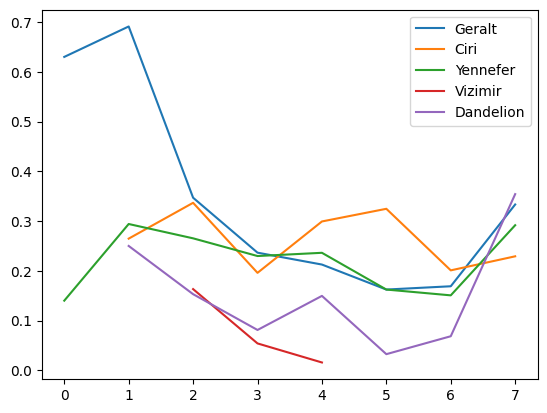

In [13]:
degree_centrality_books_df[["Geralt", "Ciri", "Yennefer", "Vizimir", "Dandelion"]].plot()

From the time series plot we can gather that **Geralt** proves to have a chronologically consistent level of importance compared to the other characters. **Ciri** too tends to have a peak in importance, and then keep a consistent streak at it too. We also observe the abscence of importance measure throughout the time-series plot for **Yennerfer**, **Vizimir** and **Dandelion**, which is attributed to the characters not being part of the different parts of the book series.

>**Breakdown**

1. **Geralt**, the protagonist of The Witcher books, exhibits a measure of importance unparalleled to other characters in the first book, **The Last Wish**. Come the second book, **The Sword of Destiny**, he still maintains the level of importance but a contender arises as **Ciri**'s storyline starts to progress.

2. **Yennefer**, another important character, is the second important individual from the first book. As **Ciri** join the mix in the latter books, **Yennefer**'s importance level tends to switch back and forth from second to third through out the evolution.

3. **Ciri**, an intriguing character from the havoc she's causing in the time-series plot, is introduced in the second book. Her importance spikes in the second book, and then slowly declines in the third, **Blood of Elves** (presumably caused by the increase in the story's sophistication and the purpose of characters to the story's part). Come the fourth book, **Times of Contempt**, it spikes back again and keeps going through out the fifth book, **Baptism of Fire**, although it's at a slower pace. She is the most important character in those books. Even though there is decline in level of importance in the sixth book, **The Tower of the Swallow**, she still holds the first place. It's after that her importance level gets lower and three other characters get the upper hand. The plotting for **The Last Wish** and **Something Ends Something Begins**, the seventh and eighth books, depict just that.

4. **Dandelion** appears to be present throughout the book series except the first. His importance level is only first to **Vizimir**, but tends to play a larger role in the final two books.

5. **Vizimir** is only present in the third and fourth books, and even then ranks last in the importance spectrum.

>**Conclusion**

As the importance spectrum primarily fluctuates among **Geralt**, **Ciri** and **Yennefer**, one could conclude that the lot are most important to the story being cooked by the book series. It is also a sensible conclusion to make based on the observation of the closely fluctuating importance that the three of them tend to cross paths and act towards the same grander goal (could be pro or against one another) in the evolution of the storyline.